<a href="https://colab.research.google.com/github/olonok69/LLM_Notebooks/blob/main/langchain/use_cases/Langchain_OpenAI_Use_cases_Chatbots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LangChain

LangChain is a framework for developing applications powered by language models.

https://python.langchain.com/docs/use_cases

## Langchain ChatBots
Chatbots are one of the most popular use-cases for LLMs. The core features of chatbots are that they can have long-running, stateful conversations and can answer user questions using relevant information.

https://python.langchain.com/docs/get_started/introduction

https://python.langchain.com/docs/use_cases/chatbots/
https://python.langchain.com/docs/use_cases/chatbots/memory_management
https://python.langchain.com/docs/use_cases/chatbots/retrieval
https://python.langchain.com/docs/use_cases/chatbots/tool_usage


https://python.langchain.com/docs/modules/model_io/prompts/

https://python.langchain.com/docs/modules/data_connection/document_transformers/recursive_text_splitter

## Tavily

https://docs.tavily.com/docs/tavily-api/introduction

Tavily Search API is a search engine optimized for LLMs and RAG, aimed at efficient, quick and persistent search results. Unlike other search APIs such as Serp or Google, Tavily focuses on optimizing search for AI developers and autonomous AI agents

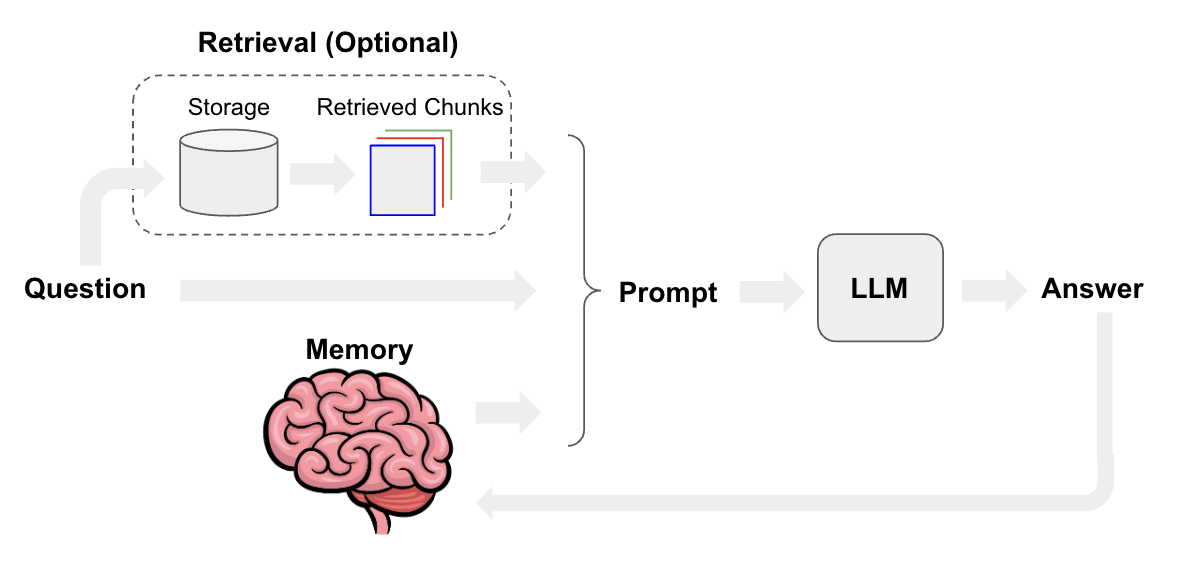

In [1]:
! pip install langchain langchain-community tiktoken -q
! pip install -U accelerate -q
! pip install -U unstructured numpy -q
! pip install openai chromadb beautifulsoup4 -q
! pip install tavily-python -q

In [2]:

from google.colab import output
output.enable_custom_widget_manager()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import userdata
openai_api_key = userdata.get('KEY_OPENAI')
tavily_api_key = userdata.get('TAVILY_API_KEY')

In [5]:
from langchain.llms import OpenAI
from langchain import LLMChain
from langchain.prompts.prompt import PromptTemplate
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
# Chat specific components
from langchain.memory import ConversationBufferMemory
import pprint

In [6]:
from langchain_community.chat_models import ChatOpenAI

chat = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.2, openai_api_key=openai_api_key)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [7]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. Answer all questions to the best of your ability.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

chain = prompt | chat

In [8]:
chain.invoke(
    {
        "messages": [
            HumanMessage(
                content="Translate this sentence from English to German: I love Snowboarding."
            ),

        ],
    }
)

AIMessage(content='"Ich liebe Snowboarden."', response_metadata={'finish_reason': 'stop', 'logprobs': None})

In [9]:
chain.invoke(
    {
        "messages": [
            HumanMessage(
                content="What did you say?"
            ),

        ],
    }
)

AIMessage(content='I am here to assist you. How can I help you today?', response_metadata={'finish_reason': 'stop', 'logprobs': None})

We can see that it doesn’t take the previous conversation turn into context, and cannot answer the question.

To get around this, we need to pass the entire conversation history into the model

In [10]:

chat.invoke(
    [
        HumanMessage(
            content="Translate this sentence from English to German: I love Snowboarding."
        ),
        AIMessage(content="Ich liebe Snowboarden."),
        HumanMessage(content="What did you just say?"),
    ]
)

AIMessage(content='I said "Ich liebe Snowboarden," which means "I love snowboarding" in German.', response_metadata={'finish_reason': 'stop', 'logprobs': None})

## Message history

In [11]:
from langchain.memory import ChatMessageHistory


chat = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.2, openai_api_key=openai_api_key)
chain = prompt | chat

chat_history = ChatMessageHistory()
chat_history.add_user_message("Translate this sentence from English to German: I love Snowboarding.")

In [12]:
chat.verbose=True

In [13]:
response = chain.invoke(
    {"messages": chat_history.messages},

)
response

AIMessage(content='"Ich liebe Snowboarden."', response_metadata={'finish_reason': 'stop', 'logprobs': None})

In [14]:
chat_history.add_ai_message(response)
chat_history.add_user_message("What did you just say?")

In [15]:
response = chain.invoke(
    {"messages": chat_history.messages}
)
response

AIMessage(content='I said, "Ich liebe Snowboarden," which means "I love snowboarding" in German.', response_metadata={'finish_reason': 'stop', 'logprobs': None})

# Retrievers
We can set up and use a Retriever to pull domain-specific knowledge for our chatbot.

## WebBaseLoader
https://python.langchain.com/docs/integrations/document_loaders/web_base

# Anthropic

https://docs.anthropic.com/claude/docs/intro-to-claude


In [16]:
from langchain_community.document_loaders import WebBaseLoader
urls = ["https://www.anthropic.com/news/claude-3-family", "https://docs.anthropic.com/claude/docs/intro-to-claude", "https://docs.anthropic.com/claude/docs/quickstart-guide",
        "https://docs.anthropic.com/claude/docs/getting-access-to-claude",         "https://docs.anthropic.com/claude/docs/intro-to-prompting",
        "https://docs.anthropic.com/claude/docs/models-overview" , "https://docs.anthropic.com/claude/docs/glossary", "https://docs.anthropic.com/claude/docs/use-cases-and-capabilities",
        "https://docs.anthropic.com/claude/docs/empirical-performance-evaluations", "https://docs.anthropic.com/claude/docs/content-moderation"]

In [17]:
loader = WebBaseLoader(urls)
data  = loader.load()


In [51]:
data[0]

Document(page_content='Introducing the next generation of Claude \\ AnthropicClaudeAPIResearchCompanyNewsCareersProductAnnouncementsIntroducing the next generation of ClaudeMar 4, 2024●7 min readTry Claude 3Today, we\'re announcing the Claude 3 model family, which sets new industry benchmarks across a wide range of cognitive tasks. The family includes three state-of-the-art models in ascending order of capability: Claude 3 Haiku, Claude 3 Sonnet, and Claude 3 Opus. Each successive model offers increasingly powerful performance, allowing users to select the optimal balance of intelligence, speed, and cost for their specific application.Opus and Sonnet are now available to use in claude.ai and the Claude API which is now generally available in 159 countries. Haiku will be available soon.Claude 3 model familyA new standard for intelligenceOpus, our most intelligent model, outperforms its peers on most of the common evaluation benchmarks for AI systems, including undergraduate level expert

In [18]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
all_splits = text_splitter.split_documents(data)

print(len(all_splits))

124


In [19]:
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OpenAIEmbeddings

In [20]:

db = Chroma()

In [21]:
vectorstore = db.from_documents(documents=all_splits, embedding=OpenAIEmbeddings(openai_api_key=openai_api_key))

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.0.9 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


#### Get most relevant documents from Vectorstore

In [22]:
# k is the number of chunks to retrieve
retriever = vectorstore.as_retriever(k=4)

docs = retriever.invoke("Which models are available in  Anthropic?")

for doc in docs:
  print(doc.page_content)
  print("-"*50)

state-of-the-art large language models developed by Anthropic. Our models are designed to provide you with the best possible experience when interacting with AI, offering a range of capabilities and performance levels to suit your needs and make it easy to deploy high performing, safe, and steerable models. In this guide, we'll introduce you to our latest and greatest models, the Claude 3 family, as well as our legacy models, which are still available for those who need them.
--------------------------------------------------
model. Source.ClaudeAPI ResearchCompanyCustomersNewsCareersPress InquiriesSupportStatusTwitterLinkedInAvailabilityTerms of Service – ConsumerTerms of Service – CommercialPrivacy PolicyAcceptable Use PolicyResponsible Disclosure PolicyCompliance© 2024 Anthropic PBC
--------------------------------------------------
Anthropic’s language models, but we present a brief summary of key terms below.
--------------------------------------------------
Models overview
-----

In [23]:
from langchain.chains.combine_documents import create_stuff_documents_chain

chat = ChatOpenAI(model="gpt-3.5-turbo", openai_api_key=openai_api_key)

question_answering_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "Answer the user's questions based on the below context:\n\n{context}",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

document_chain = create_stuff_documents_chain(chat, question_answering_prompt)

In [24]:
from langchain.memory import ChatMessageHistory

demo_ephemeral_chat_history = ChatMessageHistory()

demo_ephemeral_chat_history.add_user_message("Which models are available in  Anthropic?")

document_chain.invoke(
    {
        "messages": demo_ephemeral_chat_history.messages,
        "context": docs,
    }
)

'Anthropic offers the latest and greatest models known as the Claude 3 family, as well as legacy models that are still available for those who require them.'

# Creating a retrieval chain

In [25]:
from typing import Dict

from langchain_core.runnables import RunnablePassthrough


def parse_retriever_input(params: Dict):
    return params["messages"][-1].content


retrieval_chain = RunnablePassthrough.assign(
    context=parse_retriever_input | retriever,
).assign(
    answer=document_chain,
)

In [26]:
response = retrieval_chain.invoke(
    {
        "messages": demo_ephemeral_chat_history.messages,
    }
)

response

{'messages': [HumanMessage(content='Which models are available in  Anthropic?')],
 'context': [Document(page_content="state-of-the-art large language models developed by Anthropic. Our models are designed to provide you with the best possible experience when interacting with AI, offering a range of capabilities and performance levels to suit your needs and make it easy to deploy high performing, safe, and steerable models. In this guide, we'll introduce you to our latest and greatest models, the Claude 3 family, as well as our legacy models, which are still available for those who need them.", metadata={'description': 'Claude is a family of state-of-the-art large language models developed by Anthropic. Our models are designed to provide you with the best possible experience when interacting with AI, offering a range of capabilities and performance levels to suit your needs and make it easy to deploy high performin...', 'language': 'en', 'source': 'https://docs.anthropic.com/claude/docs

In [27]:
demo_ephemeral_chat_history.add_ai_message(response["answer"])

demo_ephemeral_chat_history.add_user_message("tell me abit more about that!, better with some detail")

response = retrieval_chain.invoke(
    {
        "messages": demo_ephemeral_chat_history.messages,
    },
)



In [28]:
response.get('messages')

[HumanMessage(content='Which models are available in  Anthropic?'),
 AIMessage(content='Anthropic offers state-of-the-art large language models, including the latest and greatest models from the Claude 3 family, as well as legacy models that are still available for those who need them.'),
 HumanMessage(content='tell me abit more about that!, better with some detail')]

In [29]:
response.get('context')

[Document(page_content='Lightweight example text use cases and prompts\nSummarize a long article for a quick overview:', metadata={'description': 'Claude is a powerful AI assistant capable of handling a wide range of tasks across various industries and domains. We hope this guide helps spark creativity and inspires you to try Claude for many varied use cases. This guide has mini starter prompts and ideas, but we encourage you to check out our ...', 'language': 'en', 'source': 'https://docs.anthropic.com/claude/docs/use-cases-and-capabilities', 'title': 'Use cases and capabilities'}),
 Document(page_content='point to precise sentences in reference material to verify their answers.Long context and near-perfect recallThe Claude 3 family of models will initially offer a 200K context window upon launch. However, all three models are capable of accepting inputs exceeding 1 million tokens and we may make this available to select customers who need enhanced processing power.To process long con

In [30]:
response.get('answer')

"Anthropic provides access to a range of models, with the Claude 3 family being a notable highlight. These models initially offer a 200K context window, but they have the capability to process inputs exceeding 1 million tokens. Additionally, select customers may have access to enhanced processing power. The models are designed to effectively handle long context prompts and demonstrate robust recall capabilities, as evidenced by the 'Needle In A Haystack' evaluation. This evaluation assesses a model's ability to accurately recall information from a vast corpus of data, with Claude 3 Opus achieving near-perfect recall, surpassing 99% accuracy in some cases."

## Query transformation
add information to the queries

In [31]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableBranch

# We need a prompt that we can pass into an LLM to generate a transformed search query

chat = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.2,  openai_api_key=openai_api_key)

query_transform_prompt = ChatPromptTemplate.from_messages(
    [
        MessagesPlaceholder(variable_name="messages"),
        (
            "user",
            "Given the above conversation, generate a search query to look up in order to get information relevant to the conversation. Only respond with the query, nothing else.",
        ),
    ]
)

query_transforming_retriever_chain = RunnableBranch(
    (
        lambda x: len(x.get("messages", [])) == 1,
        # If only one message, then we just pass that message's content to retriever
        (lambda x: x["messages"][-1].content) | retriever,
    ),
    # If messages, then we pass inputs to LLM chain to transform the query, then pass to retriever
    query_transform_prompt | chat | StrOutputParser() | retriever,
).with_config(run_name="chat_retriever_chain")

In [32]:
document_chain = create_stuff_documents_chain(chat, question_answering_prompt)

conversational_retrieval_chain = RunnablePassthrough.assign(
    context=query_transforming_retriever_chain,
).assign(
    answer=document_chain,
)

demo_ephemeral_chat_history = ChatMessageHistory()

In [33]:
demo_ephemeral_chat_history.add_user_message("Which models are available in  Anthropic?")

response = conversational_retrieval_chain.invoke(
    {"messages": demo_ephemeral_chat_history.messages},
)

demo_ephemeral_chat_history.add_ai_message(response["answer"])

response

{'messages': [HumanMessage(content='Which models are available in  Anthropic?'),
  AIMessage(content='Anthropic offers the latest and greatest models called the Claude 3 family, as well as legacy models that are still available for those who need them.')],
 'context': [Document(page_content="state-of-the-art large language models developed by Anthropic. Our models are designed to provide you with the best possible experience when interacting with AI, offering a range of capabilities and performance levels to suit your needs and make it easy to deploy high performing, safe, and steerable models. In this guide, we'll introduce you to our latest and greatest models, the Claude 3 family, as well as our legacy models, which are still available for those who need them.", metadata={'description': 'Claude is a family of state-of-the-art large language models developed by Anthropic. Our models are designed to provide you with the best possible experience when interacting with AI, offering a ran

In [34]:
pprint.pprint(response.get('answer'))

('Anthropic offers the latest and greatest models called the Claude 3 family, '
 'as well as legacy models that are still available for those who need them.')


In [35]:
pprint.pprint(response.get('context'))

[Document(page_content="state-of-the-art large language models developed by Anthropic. Our models are designed to provide you with the best possible experience when interacting with AI, offering a range of capabilities and performance levels to suit your needs and make it easy to deploy high performing, safe, and steerable models. In this guide, we'll introduce you to our latest and greatest models, the Claude 3 family, as well as our legacy models, which are still available for those who need them.", metadata={'description': 'Claude is a family of state-of-the-art large language models developed by Anthropic. Our models are designed to provide you with the best possible experience when interacting with AI, offering a range of capabilities and performance levels to suit your needs and make it easy to deploy high performin...', 'language': 'en', 'source': 'https://docs.anthropic.com/claude/docs/models-overview', 'title': 'Models overview'}),
 Document(page_content='model. Source.ClaudeA

In [36]:
response.get('messages')

[HumanMessage(content='Which models are available in  Anthropic?'),
 AIMessage(content='Anthropic offers the latest and greatest models called the Claude 3 family, as well as legacy models that are still available for those who need them.')]

In [37]:
demo_ephemeral_chat_history.add_user_message("tell me a bit more about that!, better with some detail")

response = conversational_retrieval_chain.invoke(
    {"messages": demo_ephemeral_chat_history.messages}
)

In [38]:
pprint.pprint(response.get('answer'))


('Anthropic offers the Claude 3 model family, which includes three '
 'state-of-the-art models: Claude 3 Haiku, Claude 3 Sonnet, and Claude 3 Opus. '
 'These models set new industry benchmarks across a wide range of cognitive '
 'tasks. Opus, the most intelligent model in the family, outperforms its peers '
 'on common evaluation benchmarks for AI systems. The Claude 3 models have '
 'advanced on key measures of biological knowledge, cyber-related knowledge, '
 'and autonomy compared to previous models while remaining at AI Safety Level '
 "2 (ASL-2) per Anthropic's Responsible Scaling Policy. The models have been "
 'evaluated for safety and present negligible potential for catastrophic risk '
 'at this time.\n'
 '\n'
 'The Claude 3 models are designed to be easier to use, excelling at following '
 'complex, multi-step instructions, adhering to brand voice and response '
 'guidelines, and developing customer-facing experiences that users can trust. '
 'They are also better at producin

In [39]:
pprint.pprint(response.get('context'))

[Document(page_content="state-of-the-art large language models developed by Anthropic. Our models are designed to provide you with the best possible experience when interacting with AI, offering a range of capabilities and performance levels to suit your needs and make it easy to deploy high performing, safe, and steerable models. In this guide, we'll introduce you to our latest and greatest models, the Claude 3 family, as well as our legacy models, which are still available for those who need them.", metadata={'description': 'Claude is a family of state-of-the-art large language models developed by Anthropic. Our models are designed to provide you with the best possible experience when interacting with AI, offering a range of capabilities and performance levels to suit your needs and make it easy to deploy high performin...', 'language': 'en', 'source': 'https://docs.anthropic.com/claude/docs/models-overview', 'title': 'Models overview'}),
 Document(page_content="Introducing the next 

In [40]:
import os
os.environ["TAVILY_API_KEY"] = tavily_api_key

In [41]:
from langchain_community.tools.tavily_search import TavilySearchResults


tools = [TavilySearchResults(max_results=1, tavily_api_key=tavily_api_key)]

# Choose the LLM that will drive the agent
# Only certain models support this
chat = ChatOpenAI(model="gpt-3.5-turbo", temperature=0,   openai_api_key=openai_api_key)

In [42]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

# Adapted from https://smith.langchain.com/hub/hwchase17/openai-tools-agent
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. You may not need to use tools for every query - the user may just want to chat!",
        ),
        MessagesPlaceholder(variable_name="messages"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ]
)

In [47]:
from langchain.agents import AgentExecutor, create_openai_tools_agent

agent = create_openai_tools_agent(chat, tools, prompt)

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [48]:
from langchain_core.messages import HumanMessage

agent_executor.invoke({"messages": [HumanMessage(content="I'm PoorEngineer!")]})



> Entering new AgentExecutor chain...
Hello PoorEngineer! How can I assist you today?

> Finished chain.


{'messages': [HumanMessage(content="I'm PoorEngineer!")],
 'output': 'Hello PoorEngineer! How can I assist you today?'}

In [49]:
agent_executor.invoke(
    {
        "messages": [
            HumanMessage(
                content="Who is the Primer Minister of Italy?"
            )
        ],
    }
)



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'Current Prime Minister of Italy'}`


[{'url': 'https://www.cnn.com/2022/10/22/europe/giorgia-meloni-italy-new-prime-minister-intl-cmd/index.html', 'content': 'Some fear the hard-right turn she’s promised to take\nGiorgia Meloni, the hard-right leader who was sworn in as Italy’s first female prime minister on Saturday, won the election on a campaign built around a promise to block migrant ships and support for traditional “family values” and anti-LGBTQ themes.\n Francesco Todde is a leader of the National Youth movement, a political movement put in place by Meloni’s Brothers of Italy party in 2014 to connect with a younger generation of politically interested Italians who have been frustrated with the political status quo.\n The agricultural sector, which represents 1.96% of Italy’s GDP, is facing a shortage of everything from fertilizers, to diesel, to electricity and glass, causing prices 

{'messages': [HumanMessage(content='Who is the Primer Minister of Italy?')],
 'output': 'The current Prime Minister of Italy is Giorgia Meloni. She is the first female prime minister of Italy and is known for her hard-right stance on issues such as blocking migrant ships and supporting traditional family values and anti-LGBTQ themes.'}

In [50]:
agent_executor.invoke(
    {
        "messages": [
            SystemMessage(content="you are a helpful chatbot which answer question at the best of your knowledge, try to find always the most accurate response"),
            HumanMessage(
                content="What is the current status of Ukraine Russia war?. "

            )
        ],
    }
)



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'Ukraine Russia war current status'}`


[{'url': 'https://www.aljazeera.com/news/2022/2/28/russia-ukraine-crisis-in-maps-and-charts-live-news-interactive', 'content': 'Skip links\nLive\nNavigation menu\nLive\nRussia-Ukraine war in maps and charts: Live Tracker\nThe Russian offensive enters its 1O6th week, we track where battles are taking place and the human cost of war.\n At 603,550sq km (233,031sq miles), Ukraine is a bit smaller than the US state of Texas, about three times smaller than India, half the size of South Africa and about two and a half times the size of the United Kingdom.\n Keep reading\nThe human toll of the Russia-Ukraine warExternal LinkThis article will be opened in a new browser window\nInfographic: How much of your country’s oil comes from Russia?\n Ukraine and Russia explained in ten maps and charts\nBelow are ten infographics that break down the history, politics and 

{'messages': [SystemMessage(content='you are a helpful chatbot which answer question at the best of your knowledge, try to find always the most accurate response'),
  HumanMessage(content='What is the current status of Ukraine Russia war?. ')],
 'output': 'The Russia-Ukraine war is ongoing, with the Russian offensive entering its 106th week. Battles are taking place in various locations, and the human cost of the war continues to be significant. If you would like more detailed information, you can visit this [link](https://www.aljazeera.com/news/2022/2/28/russia-ukraine-crisis-in-maps-and-charts-live-news-interactive).'}